<a href="https://colab.research.google.com/github/VectorJamo/Deep-Learning/blob/main/02_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

torch.__version__

'2.5.1+cu121'

### PyTorch Workflow
1. Convert the data into Tensors
2. Pick a training algorithm, loss function and an optimizer
3. Build the training loop
4. Build the model(Get the model parameters)
5. Use the model for inference(prediction)




In [ ]:
# We will be implmenting Linear Regression in PyTorch

# Create the learnable parameters
weight = 0.2
bias = 1

# Create a sample dataset
start = 0
stop = 10
step  = 0.1

X = torch.arange(start, stop, step).unsqueeze(dim=1) # Features
y = weight*X + bias # Labels
X[:10], y[:10]

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000]]),
 tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]))

**Split the data into training and testing set**

Training set: 60-80% of the original dataset

Testing set: 20-30% of the original dataset

In [ ]:
training_ratio = 0.8 # 80% of the original dataset
num_training_data = int(len(X) * training_ratio)

X_train, y_train = X[:num_training_data], y[:num_training_data]
X_test, y_test = X[num_training_data:], y[num_training_data:]

len(X_train), len(X_test)

(80, 20)

**Visualize the data**

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 8)) # Size of the axes

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # c = color, s = size

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

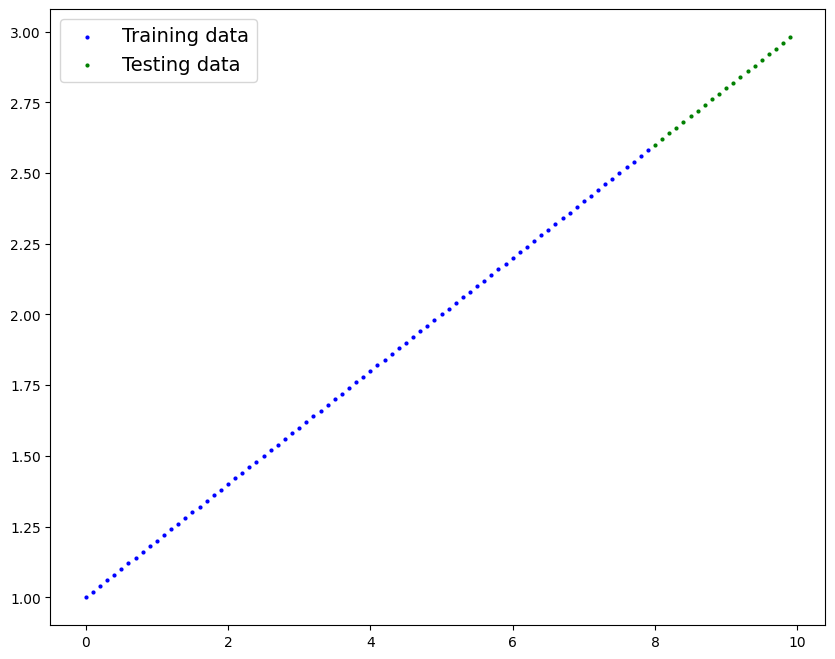

In [ ]:
plot_predictions()

**Build the model**

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1), requires_grad=True) # Start with a random weight value.
    self.bias = nn.Parameter(torch.randn(1), requires_grad=True) # Start with a random bias value.

  # Specify the forward computation (the calculations to be made with our input tensors).
  def forward(self, X_train):
    y = self.weights * X_train + self.bias
    return y

In [ ]:
# So that we can reproduce the random values of our parameters in the future if needed
torch.manual_seed(40)

# Create the model instance
model = LinearRegressionModel()
# List the parameters
for x in model.named_parameters():
  print(x)

('weights', Parameter containing:
tensor([0.9307], requires_grad=True))
('bias', Parameter containing:
tensor([-0.3482], requires_grad=True))


In [ ]:
# List the model's state values with contains the model parameters
model.state_dict()

OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([-0.3482]))])

**Making Predictions (before training, using those random weights and biases)**

In [ ]:
# Turn off gradient calculations
with torch.no_grad():
  y_predictions = model.forward(X_test)

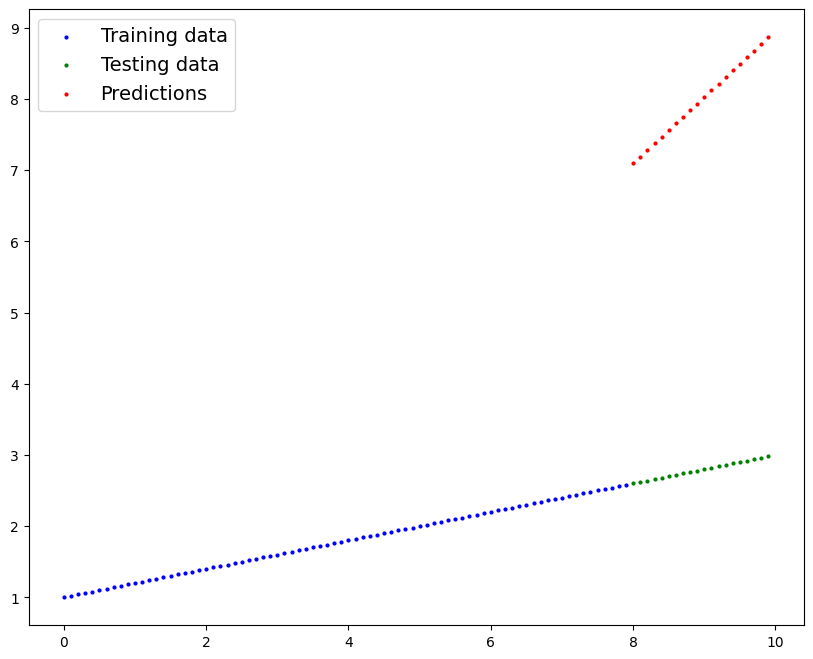

In [ ]:
plot_predictions(predictions=y_predictions)

The predictions are very bad, which is obvious since we are using the random values of weights and biases for our prediction. Now, let's train the model and update those parameters to better fit out data.

**Train the model**

Creating the loss function and the optimizer

**Loss function**: Calculates how wrong the model was in its prediction. In linear regression, it is defined as the square of the difference between the predicted value and the actual value(mean squared error(MAE) loss)

**Optimizer**: Tells the model how to change(optimize) the parameter values to reduce the loss. Commonly used one is the Stochastic Gradient Descent(SGD) where we take small steps in the direction that reduces the loss.


In [ ]:
# Create the loss function
loss_function = nn.L1Loss()

# Create the optimizer function
learning_rate = 0.005 # How big the gradient descent steps should be
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

### Creating the training loop
1. **Forward pass**: The model calculates(predicts) the labels using the input training data and the initial parameter values
2. **Calculate the loss**: The model computues the loss using its predictions and the actual value of the labels.
3. **Backpropagation**: Compute the partial derivate of the loss function with respect to each parameter to see when the value of a parameter is nudged up a little bit, what happens to the loss(the loss increases or decreases). This partial derivate is calculated for all the model parameters and its effects on the loss(the gradient) is stored to perform gradient descent.
4. **Gradient descent**: Change the values of the parameters such that the training loss decreases using the gradients computed during backpropagtion and the learing rate defined by the programmer.


These steps are done for many rounds(epochs) until the loss between the training rounds doesnot change by that much.

The loss is calculated by our **loss function** and backpropagation and gradient descent is computed by our **optimizer function**.

In [ ]:
epochs = 1000 # Total number of training rounds. This is the number of times our model with go through the entire data set and
# compute all the above mentioned steps.
training_loss = {}

# Put the model in training mode (this is the default one)
model.train()

# Training loop
for i in range(0, epochs):

  # Forward pass
  y_pred = model.forward(X_train)

  # Calculate the loss
  loss = loss_function(y_pred, y_train)

  # Gradients are accumulated in the .grad attribute of each parameter.
  # The function below clears the gradients of all parameters from previous .backward() call
  optimizer.zero_grad()

  # Do backpropagation (compute the gradients(partial derivatives of the loss function w.r.t each parameter)).
  # These are then stored into parameter.grad for every parameter.
  loss.backward()

  # Update the parameters based on the gradients computed above
  optimizer.step()

  if i%5 == 0:
    training_loss[i] = loss.item()

In [ ]:
for epoch, loss in training_loss.items():
  print("Loss:", loss)

Loss: 1.86614990234375
Loss: 1.5582295656204224
Loss: 1.279961347579956
Loss: 1.0379469394683838
Loss: 0.8450849652290344
Loss: 0.7089526653289795
Loss: 0.6299958229064941
Loss: 0.5927217602729797
Loss: 0.5788723230361938
Loss: 0.5722231268882751
Loss: 0.5673797726631165
Loss: 0.5631296634674072
Loss: 0.5588797330856323
Loss: 0.5546297430992126
Loss: 0.550379753112793
Loss: 0.5461297035217285
Loss: 0.5418996810913086
Loss: 0.5376697182655334
Loss: 0.5334396362304688
Loss: 0.5292096734046936
Loss: 0.5249797105789185
Loss: 0.5207496881484985
Loss: 0.5165196657180786
Loss: 0.5122897028923035
Loss: 0.5080596804618835
Loss: 0.5038296580314636
Loss: 0.4995996952056885
Loss: 0.4953696131706238
Loss: 0.4911397099494934
Loss: 0.4869096875190735
Loss: 0.48267966508865356
Loss: 0.47844967246055603
Loss: 0.4742196500301361
Loss: 0.46998968720436096
Loss: 0.46575966477394104
Loss: 0.4615297317504883
Loss: 0.4572996497154236
Loss: 0.45306968688964844
Loss: 0.4488397240638733
Loss: 0.4446097016334533

In [ ]:
# The updated parameters
for x in model.named_parameters():
  print(x)

('weights', Parameter containing:
tensor([0.1998], requires_grad=True))
('bias', Parameter containing:
tensor([0.9951], requires_grad=True))


In [ ]:
# Put the model into testing mode
model.eval()

with torch.no_grad():
  y_pred = model.forward(X_test)


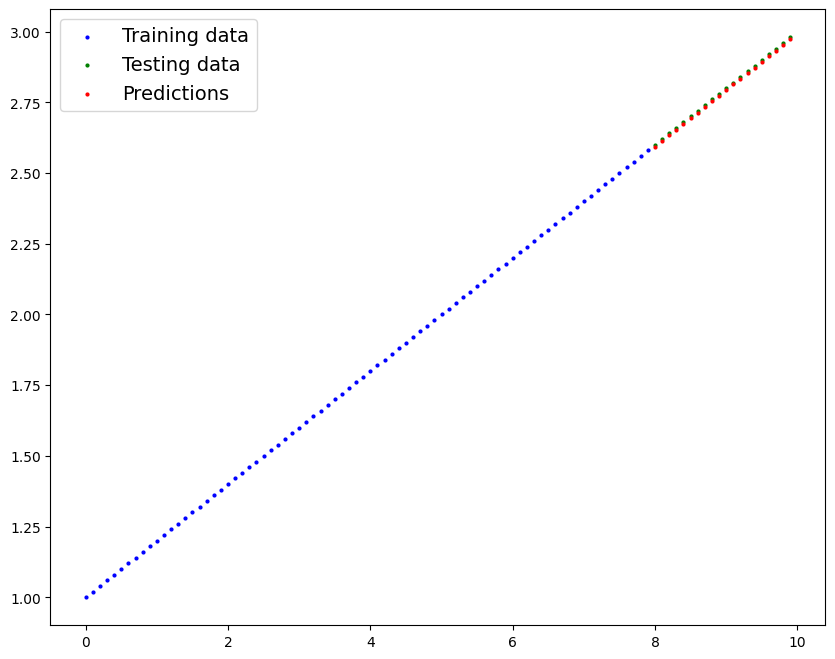

In [ ]:
plot_predictions(predictions=y_pred)

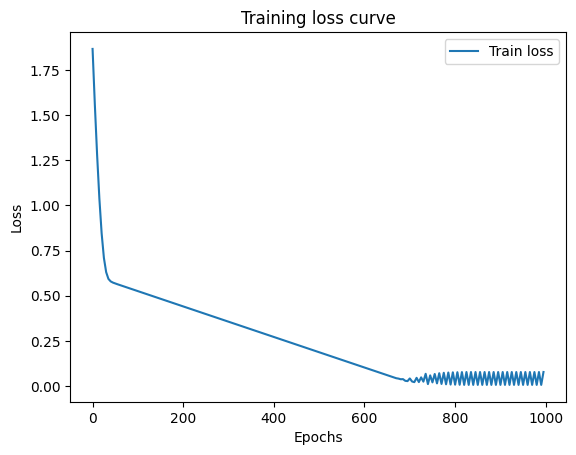

In [ ]:
# Plot the loss curves
plt.plot(training_loss.keys(), training_loss.values(), label="Train loss")
plt.title("Training loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Looking at the graph above, we will probably be good with just around 700 epochs.

## Saving a Model
1. You could serialize your Model's class and save the entire class object using `torch.save()`
2. Models saved using such technique can be loaded back using the `torch.load()` function.

In python, serializing and deserializing a class is handled by the built in `pickle` module.

3. Or, you could save the state dictonary of your Model which contains all the information regarding your model's parameters. This is the officially recommended way of saving and reloading a model in PyTorch.

 `model.state_dict()` simply returns a Python dictionary object that maps each layer to its parameter tensor.


In [ ]:
# Saving models
from pathlib import Path

# Create the models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) # Create the models directory

# Create model save path
MODEL_NAME = "02_PyTorch_Workflow_LR_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/02_PyTorch_Workflow_LR_Model.pth


In [ ]:
# Loading models
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))
model.eval() # Put the model into evaluation mode

model.state_dict()

OrderedDict([('weights', tensor([0.1998])), ('bias', tensor([0.9951]))])

In [ ]:
torch.cuda.is_available()

True

### Using the GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Creating a linear regression model with nn.Linear
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, training_x):
    predicted_value = self.linear_layer(training_x)
    return predicted_value

`nn.Linear(in_features, out_features)` applies a linear transformation on the vector of dimension `in_features` and outputs another vector of dimension `out_features`.

`y = x*(Weights)^T + bias`

nn.Linear can be thought of as a single layer of a neural network, where each neurons have their own **weight vector** and a **bias value**. A single input vector **x** is then sent to each of the neurons in the layer which then performs a dot product of the input vector and the neuron's weights and adds a bias value to output a single scalar. The outputs of all the neurons of the layer is appened to form a vector which is the output vector of that layer.

Hence, in this light, **out_features** is the number of neurons of the layer that each output a scalar based on their own values of weight vector and bias value. Since, the weight vector is multipled by the input features(with a dimension of in_features) in each of the neurons(which there are out_features of), the dimension of the weight matrix is **out_features * in_features** and the dimension of the bias vector is **out_features***.

To represent all this in a single equation, the weights of all the neurons can be stacked to create a **weight matrix**, and the biases of each of the neurons can be appeneded to form a **bias vector**. Now, a single layer's computation can be explained by the above written equation.

I have drawn a comprehensive diagram and a mathematical rundown of how this works in complete detail in my handwritten notes.

With this knowledge of how nn.Linear works, we can simulate a Linear Regression Model with a nn.Linear layer that takes a single value as input and outputs a single value.

In [ ]:
# Create the model
model_2 = LinearRegressionModel2()

model_2.train() # Put the model in training mode(default)

next(model_2.parameters()).device # Check model's parameters residence device

device(type='cpu')

In [ ]:
# Send the model's parameters to the GPU
model_2.to(device)

# Create the loss function
loss_function = nn.L1Loss()

next(model_2.parameters()).device # Recheck

device(type='cuda', index=0)

In [ ]:
# Create the optimizer
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
epochs = 500

# Send all the training data to the GPU as well
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for i in range(0, epochs):
  # Get the model's predictions
  y_pred = model_2.forward(X_train)

  # Get the loss value
  loss = loss_function(y_pred, y_train)

  # Clear the gradients computed from the previous step
  optimizer.zero_grad()

  # Do backpropagation (calculate gradients)
  loss.backward()

  # Optimize the parameters with the help of their gradients (Perform gradient descent)
  optimizer.step()

  if i%10 == 0:
    print(f"R: {i}. Loss: {loss.item()}")

R: 0. Loss: 4.309640407562256
R: 10. Loss: 2.649390935897827
R: 20. Loss: 0.9891409873962402
R: 30. Loss: 0.668281078338623
R: 40. Loss: 0.6511959433555603
R: 50. Loss: 0.6342759132385254
R: 60. Loss: 0.6173559427261353
R: 70. Loss: 0.6004359126091003
R: 80. Loss: 0.5835158824920654
R: 90. Loss: 0.5665959119796753
R: 100. Loss: 0.5496758818626404
R: 110. Loss: 0.5327558517456055
R: 120. Loss: 0.5158359408378601
R: 130. Loss: 0.4989158809185028
R: 140. Loss: 0.48199597001075745
R: 150. Loss: 0.4650759696960449
R: 160. Loss: 0.4481559693813324
R: 170. Loss: 0.43123599886894226
R: 180. Loss: 0.41431599855422974
R: 190. Loss: 0.3973960280418396
R: 200. Loss: 0.3804759979248047
R: 210. Loss: 0.36355602741241455
R: 220. Loss: 0.3466360867023468
R: 230. Loss: 0.32971611618995667
R: 240. Loss: 0.31279611587524414
R: 250. Loss: 0.2958761155605316
R: 260. Loss: 0.2789561450481415
R: 270. Loss: 0.2620360851287842
R: 280. Loss: 0.24511606991291046
R: 290. Loss: 0.22819609940052032
R: 300. Loss: 0.

In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2342]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9978], device='cuda:0'))])